In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler

In [35]:
trainloan=pd.read_csv('/content/train_loan_preprocess (1).csv')
trainloan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
trainloan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
trainloan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [38]:
trainloan.shape

(614, 13)

In [39]:
trainloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [40]:
trainloan.drop(columns=['CoapplicantIncome'],inplace=True)
trainloan.isna().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
trainloan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [42]:
trainloan['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

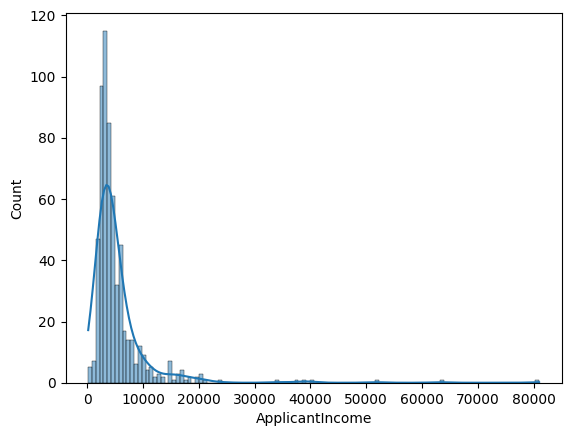

In [43]:
sns.histplot(trainloan['ApplicantIncome'],kde=True)

<Axes: xlabel='LoanAmount', ylabel='Count'>

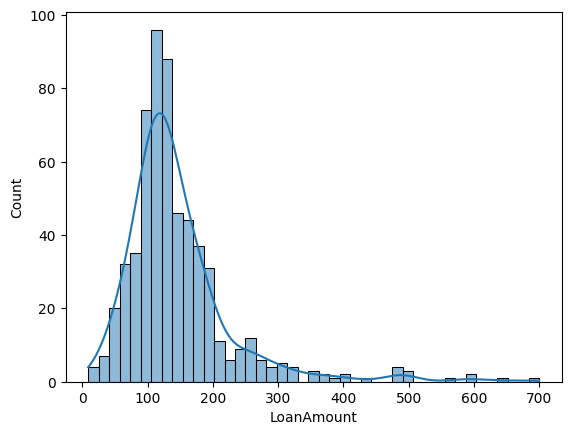

In [44]:
sns.histplot(trainloan['LoanAmount'],kde=True)

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

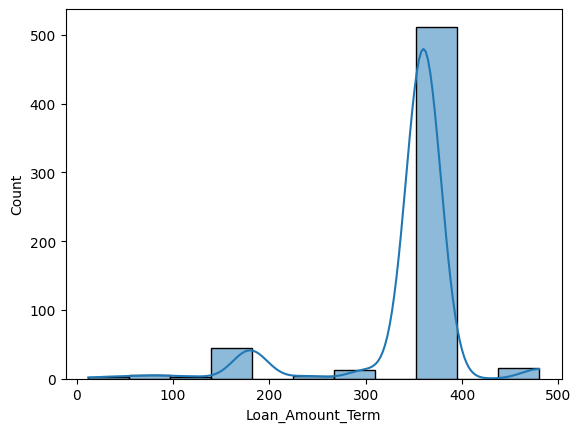

In [45]:
sns.histplot(trainloan['Loan_Amount_Term'],kde=True)

<Axes: xlabel='Credit_History', ylabel='Count'>

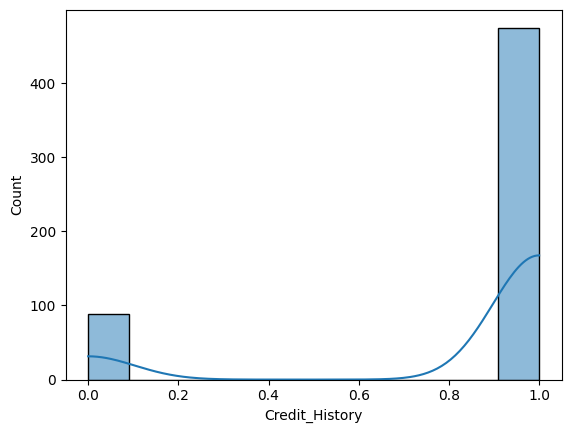

In [46]:
sns.histplot(trainloan['Credit_History'],kde=True)

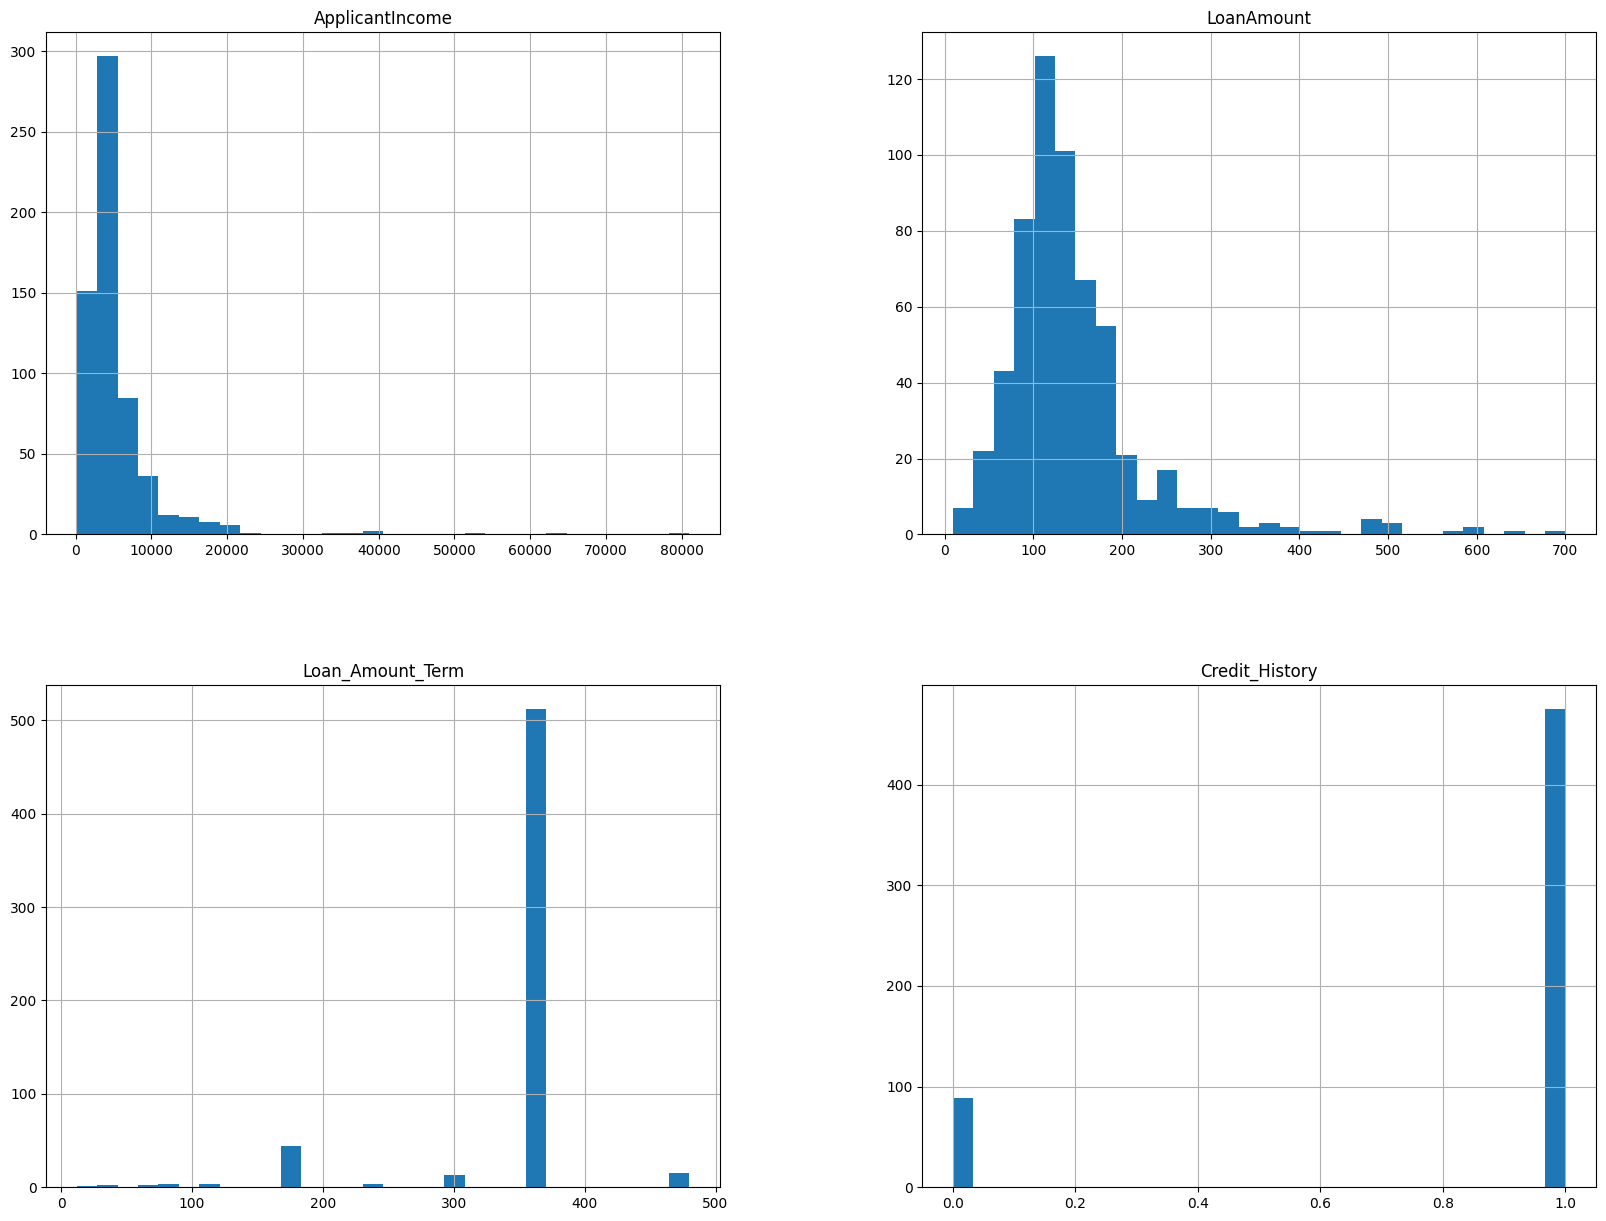

In [47]:
trainloan.hist(bins=30, figsize=(20, 15))
plt.show()

In [48]:
trainloan['Gender'].fillna(trainloan['Gender'].mode()[0],inplace=True)
trainloan['Married'].fillna(trainloan['Married'].mode()[0],inplace=True)
trainloan['Dependents'].fillna(trainloan['Dependents'].mode()[0],inplace=True)
trainloan['Self_Employed'].fillna(trainloan['Self_Employed'].mode()[0],inplace=True)
trainloan['LoanAmount'].fillna(trainloan['LoanAmount'].mean(),inplace=True)
trainloan['Credit_History'].fillna(trainloan['Credit_History'].mean(),inplace=True)
trainloan['Loan_Amount_Term'].fillna(trainloan['Loan_Amount_Term'].mean(),inplace=True)
trainloan.isna().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

In [49]:
columns_to_change=['ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

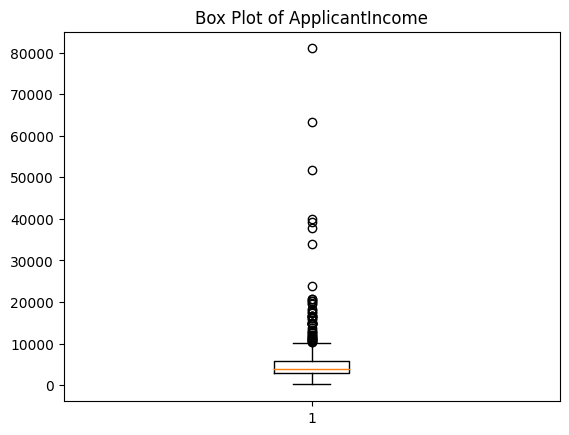

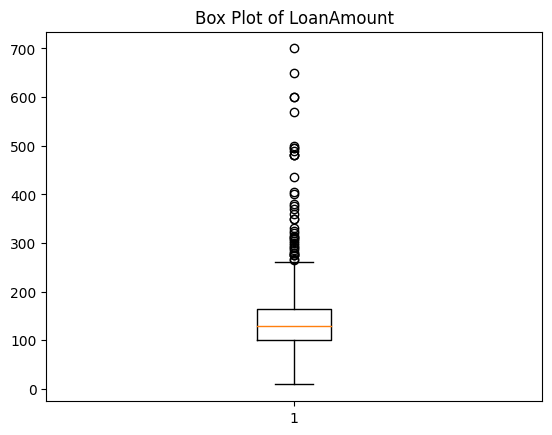

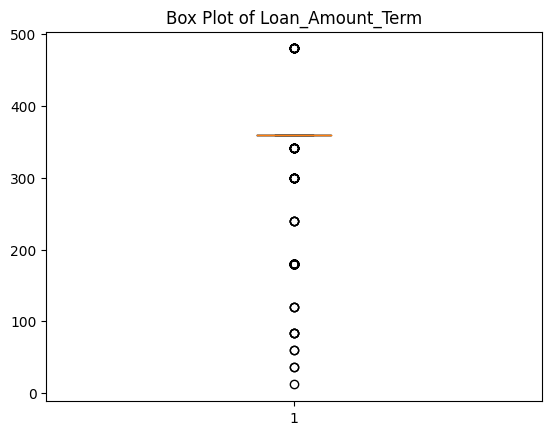

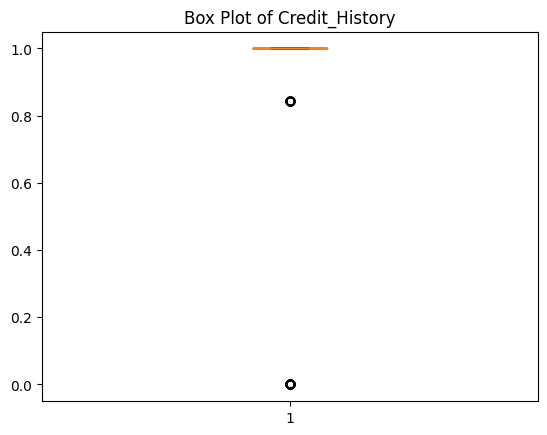

In [50]:
for col in columns_to_change:
  plt.figure()
  plt.boxplot(trainloan[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

In [51]:
q1=np.percentile(trainloan['ApplicantIncome'],25,interpolation="midpoint")
q2=np.percentile(trainloan['ApplicantIncome'],50,interpolation="midpoint")
q3=np.percentile(trainloan['ApplicantIncome'],75,interpolation="midpoint")
IQR=q3-q1
min_value=q1-1.5*IQR
max_value=q3+1.5*IQR
print(min_value,max_value)
outliers=[]
for i in trainloan['ApplicantIncome']:
  if((i>max_value)) or ((i<min_value)):
    outliers.append(i)
outliers

-1487.5 10156.5


[12841,
 12500,
 11500,
 10750,
 13650,
 11417,
 14583,
 10408,
 23803,
 10513,
 20166,
 14999,
 11757,
 14866,
 39999,
 51763,
 33846,
 39147,
 12000,
 11000,
 16250,
 14683,
 11146,
 14583,
 20667,
 20233,
 15000,
 63337,
 19730,
 15759,
 81000,
 14880,
 12876,
 10416,
 37719,
 16692,
 16525,
 16667,
 10833,
 18333,
 17263,
 20833,
 13262,
 17500,
 11250,
 18165,
 19484,
 16666,
 16120,
 12000]

In [52]:
q1=np.percentile(trainloan['LoanAmount'],25,interpolation="midpoint")
q2=np.percentile(trainloan['LoanAmount'],50,interpolation="midpoint")
q3=np.percentile(trainloan['LoanAmount'],75,interpolation="midpoint")
IQR=q3-q1
min_value=q1-1.5*IQR
max_value=q3+1.5*IQR
print(min_value,max_value)
outliers=[]
for i in trainloan['LoanAmount']:
  if((i>max_value)) or ((i<min_value)):
    outliers.append(i)
outliers

4.5 260.5


[267.0,
 349.0,
 315.0,
 320.0,
 286.0,
 312.0,
 265.0,
 370.0,
 650.0,
 290.0,
 600.0,
 275.0,
 700.0,
 495.0,
 280.0,
 279.0,
 304.0,
 330.0,
 436.0,
 480.0,
 300.0,
 376.0,
 490.0,
 308.0,
 570.0,
 380.0,
 296.0,
 275.0,
 360.0,
 405.0,
 500.0,
 480.0,
 311.0,
 480.0,
 400.0,
 324.0,
 600.0,
 275.0,
 292.0,
 350.0,
 496.0]

In [53]:
q1=np.percentile(trainloan['Loan_Amount_Term'],25,interpolation="midpoint")
q2=np.percentile(trainloan['Loan_Amount_Term'],50,interpolation="midpoint")
q3=np.percentile(trainloan['Loan_Amount_Term'],75,interpolation="midpoint")
IQR=q3-q1
min_value=q1-1.5*IQR
max_value=q3+1.5*IQR
print(min_value,max_value)
outliers=[]
for i in trainloan['Loan_Amount_Term']:
  if((i>max_value)) or ((i<min_value)):
    outliers.append(i)
outliers

360.0 360.0


[120.0,
 240.0,
 342.0,
 342.0,
 342.0,
 342.0,
 180.0,
 180.0,
 60.0,
 300.0,
 342.0,
 480.0,
 300.0,
 240.0,
 180.0,
 120.0,
 180.0,
 180.0,
 480.0,
 342.0,
 180.0,
 180.0,
 480.0,
 120.0,
 180.0,
 180.0,
 180.0,
 180.0,
 342.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 300.0,
 180.0,
 342.0,
 180.0,
 342.0,
 480.0,
 180.0,
 342.0,
 180.0,
 60.0,
 180.0,
 180.0,
 480.0,
 180.0,
 36.0,
 180.0,
 300.0,
 480.0,
 480.0,
 84.0,
 180.0,
 180.0,
 180.0,
 342.0,
 180.0,
 480.0,
 300.0,
 480.0,
 342.0,
 300.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 180.0,
 300.0,
 300.0,
 342.0,
 342.0,
 180.0,
 240.0,
 300.0,
 300.0,
 180.0,
 180.0,
 180.0,
 180.0,
 300.0,
 84.0,
 12.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 180.0,
 36.0,
 180.0,
 480.0,
 84.0,
 84.0,
 180.0,
 240.0,
 180.0,
 180.0,
 180.0,
 180.0]

In [54]:
q1=np.percentile(trainloan['Credit_History'],25,interpolation="midpoint")
q2=np.percentile(trainloan['Credit_History'],50,interpolation="midpoint")
q3=np.percentile(trainloan['Credit_History'],75,interpolation="midpoint")
IQR=q3-q1
min_value=q1-1.5*IQR
max_value=q3+1.5*IQR
print(min_value,max_value)
outliers=[]
for i in trainloan['Credit_History']:
  if((i>max_value)) or ((i<min_value)):
    outliers.append(i)
outliers

1.0 1.0


[0.0,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.0,
 0.8421985815602837,
 0.0,
 0.8421985815602837,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.8421985815602837,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8421985815602837,
 0.0,
 0.0,
 0.8421985815602837,
 0.0,
 0.0,
 0.8421985815602837,
 0.0,
 0.8421985815602837,
 0.8421985815602837,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [55]:
categorical_cols=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
numerical_cols=['ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [56]:
trainloan_encoded=pd.get_dummies(trainloan,columns=categorical_cols,dtype=int,drop_first=True)
trainloan_encoded.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,146.412162,360.0,1.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,4583,128.000000,360.0,1.0,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,3000,66.000000,360.0,1.0,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,2583,120.000000,360.0,1.0,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,1,1
4,6000,141.000000,360.0,1.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1


In [57]:
trainloan_encoded.shape

(614, 627)

In [59]:
trainloan_std_scaled=trainloan_encoded.copy()
std_scaler=StandardScaler()
trainloan_std_scaled[numerical_cols]=std_scaler.fit_transform(trainloan_std_scaled[numerical_cols])
trainloan_std_scaled.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.072991,0.000000,0.279851,0.45164,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,-0.134412,-0.219273,0.279851,0.45164,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,-0.393747,-0.957641,0.279851,0.45164,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,-0.462062,-0.314547,0.279851,0.45164,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,1,1
4,0.097728,-0.064454,0.279851,0.45164,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1


In [65]:
trainloan_std_scaled.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,-4.339634e-18,5.786179e-18,3.905671e-17,2.488057e-16,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,...,0.817590,0.653094,0.166124,0.164495,0.083062,0.218241,0.133550,0.379479,0.328990,0.687296
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,0.040357,0.040357,0.040357,0.040357,0.040357,0.040357,...,0.386497,0.476373,0.372495,0.371027,0.276201,0.413389,0.340446,0.485653,0.470229,0.463973
min,-8.606493e-01,-1.636463e+00,-5.130593e+00,-2.410441e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.138159e-01,-5.497524e-01,2.798505e-01,4.516405e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.606393e-01,-2.073642e-01,2.798505e-01,4.516405e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.414426e-02,2.183882e-01,2.798505e-01,4.516405e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.238462e+01,6.592764e+00,2.145521e+00,4.516405e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
trainloan_minmax_scaled=trainloan_encoded.copy()
minmax_scaler=MinMaxScaler()
trainloan_minmax_scaled[numerical_cols]=minmax_scaler.fit_transform(trainloan_minmax_scaled[numerical_cols])
trainloan_minmax_scaled.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.070489,0.198860,0.74359,1.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,0.054830,0.172214,0.74359,1.0,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,0.035250,0.082489,0.74359,1.0,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,0.030093,0.160637,0.74359,1.0,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,1,1
4,0.072356,0.191027,0.74359,1.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1


In [67]:
corr_colunmns=[
       'ApplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
original_trainloan_corr=trainloan[corr_colunmns].corr()
original_trainloan_corr

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,0.565620,-0.045242,-0.014477
LoanAmount,0.565620,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.007738,0.001395,1.000000


<Axes: >

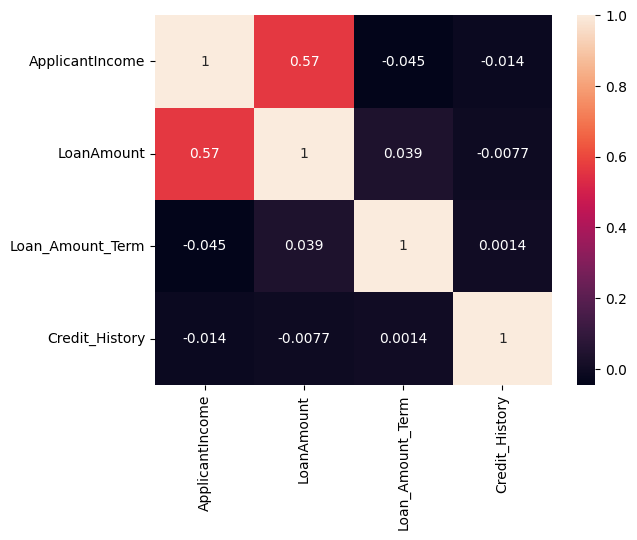

In [68]:
import seaborn as sns
sns.heatmap(original_trainloan_corr,annot=True)

In [69]:
scaled_trainloan_corr=trainloan_std_scaled[corr_colunmns].corr()
scaled_trainloan_corr

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,0.565620,-0.045242,-0.014477
LoanAmount,0.565620,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.007738,0.001395,1.000000


<Axes: >

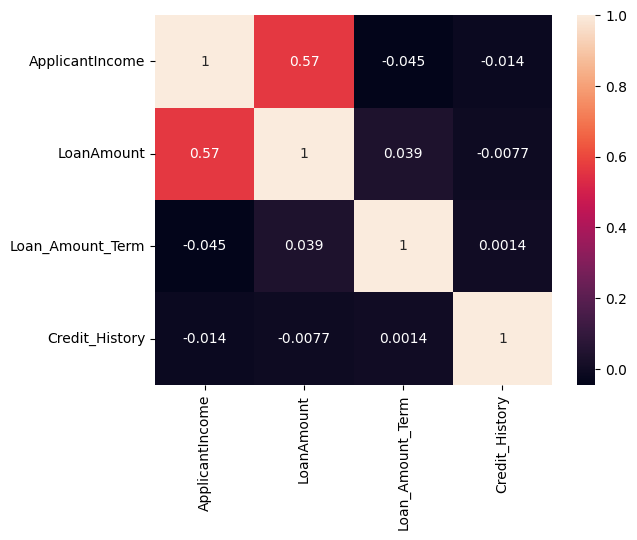

In [70]:
sns.heatmap(scaled_trainloan_corr,annot=True)